In [47]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score 
from IPython.display import Image 
import seaborn as sns
from IPython.display import Image 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [12]:
df=pd.read_csv("C:\\Users\\ritik\\Downloads\\datasets-20221227T153602Z-001\\datasets\\data sets\\titanic\\train.csv")

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

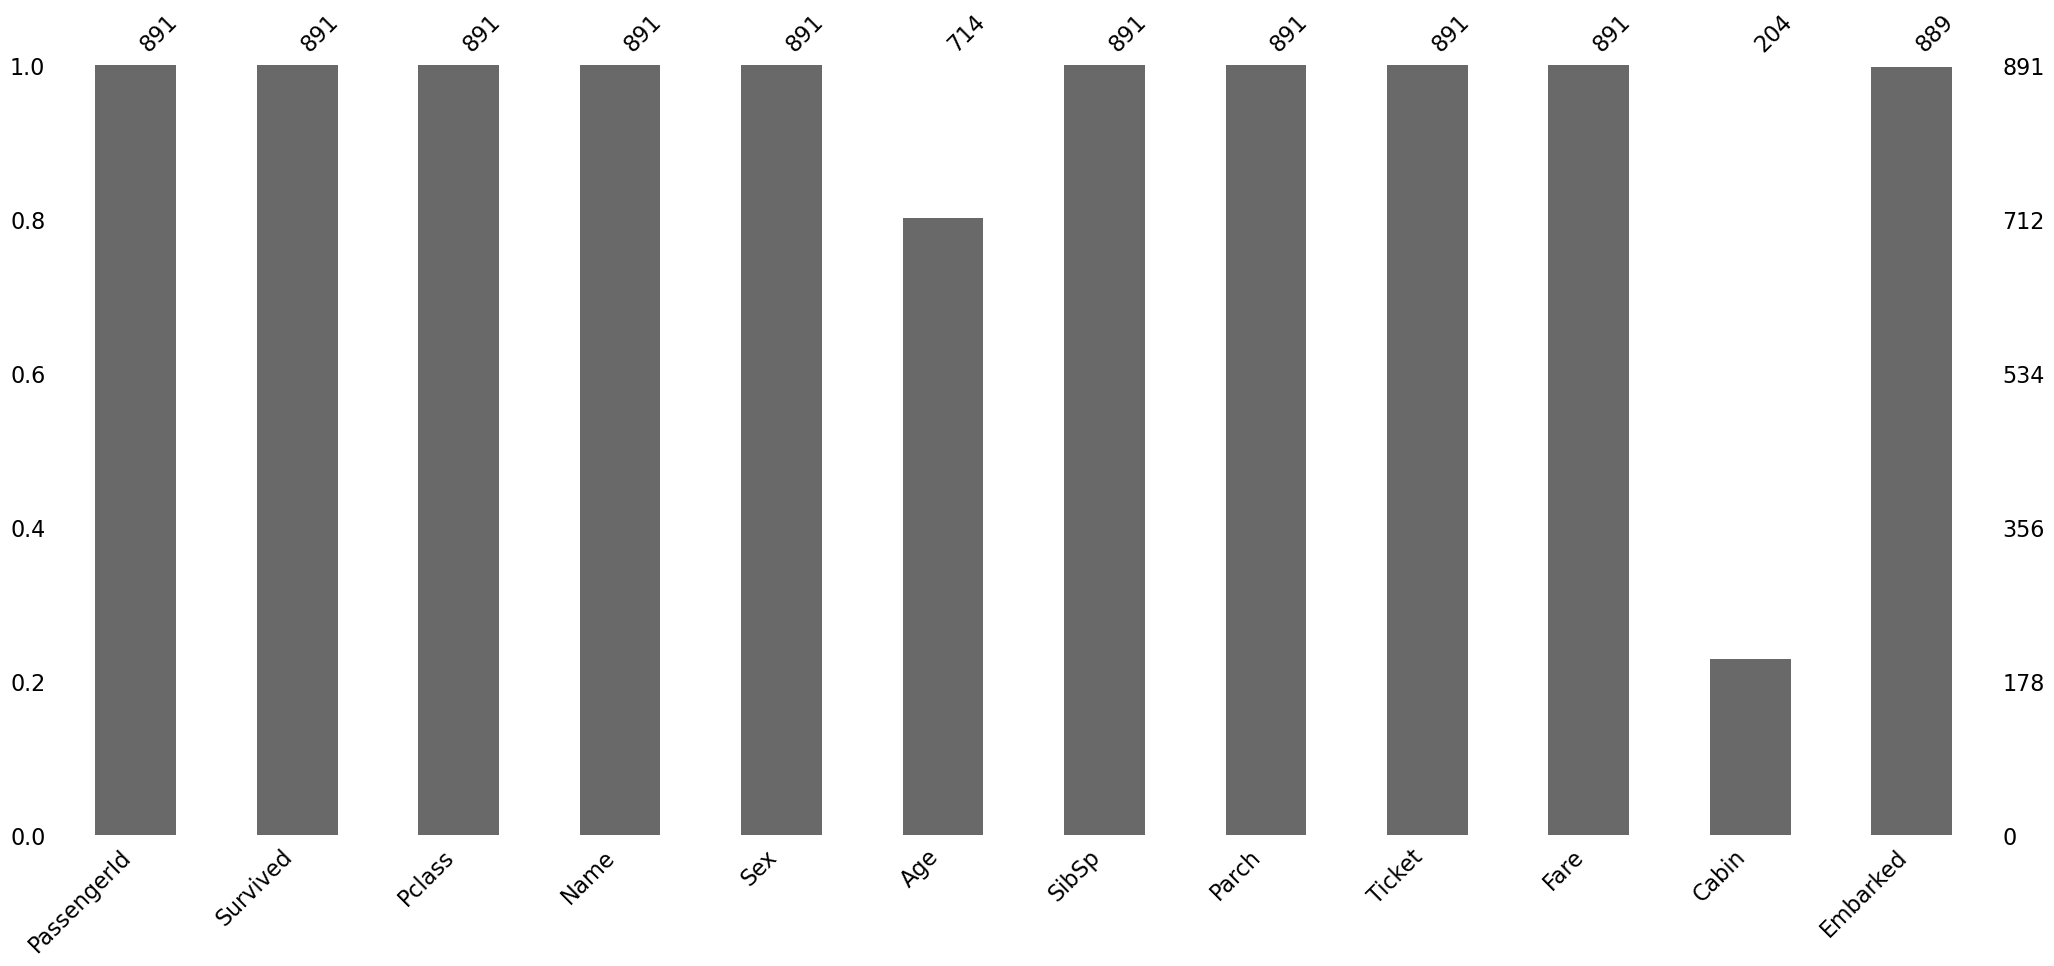

In [16]:
import missingno as msno
msno.bar(df)

In [17]:
df.drop(columns=["PassengerId","Cabin","Ticket","Name"],inplace=True) 

- because this columns are irrelavent

In [18]:
df["Age"]=df["Age"].fillna(df["Age"].mean())
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [19]:
df.isnull().sum().sum()

0

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df["Sex"]=df["Sex"].replace({"male":0,"female":1})
df["Embarked"]=df["Embarked"].replace({"S":0,"C":1,"Q":2})

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


## Seggregate x:as feature or inputs and y as target

In [23]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

- to check the imbalance

In [24]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- so here is not that much gap between the catagories so its balance data

## Splitting the data into train and test

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

## Create the model

In [26]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
## Evaluate

In [28]:
y_pred=dtc.predict(x_test)

In [29]:
## accuracy on test data
accuracy_score(y_test,y_pred)

0.7623318385650224

In [30]:
y_pred_train=dtc.predict(x_train)
accuracy_score(y_train,y_pred_train)

0.9835329341317365

- this is seems overfitting because of high variance due to decision tree

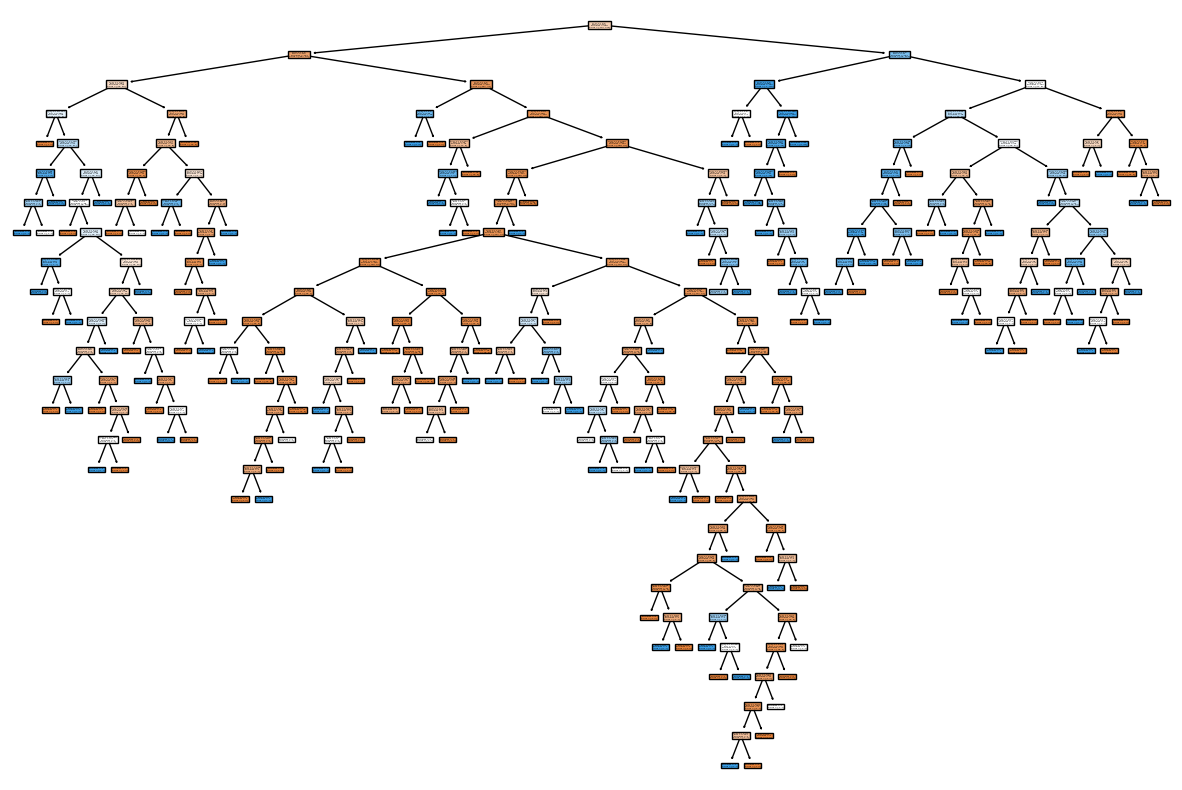

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True)
plt.show()

In [36]:
 grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}


In [37]:
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1) 

In [38]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [39]:
grid_search.best_score_

0.8397935136348333

In [40]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}


In [44]:
dtc_h=DecisionTreeClassifier(**best_parameters)
dtc_h.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=6, splitter='random')

In [45]:
y_pred_h=dtc_h.predict(x_test)
accuracy_score(y_test,y_pred_h)

0.8161434977578476

In [46]:
## Accuracy got increased using hyperparameter tuning and this accuracy is with respect to the model at best parameters in repect to the model and this is 

## Create random forest

In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=rfc.predict(x_test)
accuracy_score(y_test,y_pred)

0.7937219730941704

In [50]:
l=[2,5,10,20,50,100,200,500]
test_acc=[]
train_acc=[]
for i in l:
    rfc=RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    ac_t=accuracy_score(y_test,y_pred)
    y_pred_train=rfc.predict(x_train)
    ac_tr=accuracy_score(y_train,y_pred_train)
    test_acc.append(ac_t)
    train_acc.append(ac_tr)
print(train_acc) 
print(test_acc)


[0.9131736526946108, 0.9625748502994012, 0.9715568862275449, 0.9745508982035929, 0.9835329341317365, 0.9835329341317365, 0.9835329341317365, 0.9835329341317365]
[0.7713004484304933, 0.7713004484304933, 0.7713004484304933, 0.7847533632286996, 0.7802690582959642, 0.7982062780269058, 0.7892376681614349, 0.7982062780269058]


Text(0.5, 0, 'no of estimators')

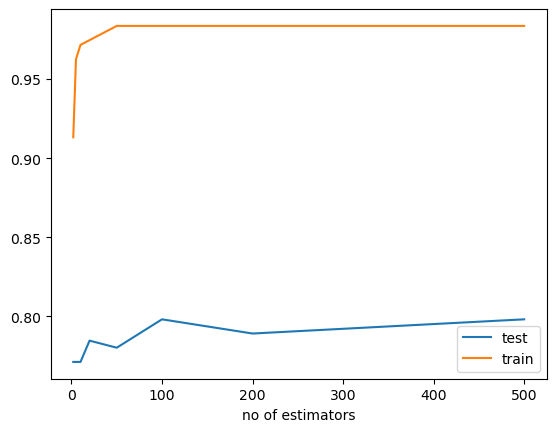

In [51]:
plt.plot(l,test_acc,label="test")
plt.plot(l,train_acc,label="train")
plt.legend()
plt.xlabel("no of estimators")